In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression
from datetime import datetime
#from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
path1 = "tsla_raw_data.csv"
path2 = "tsla_split_adjusted.csv"
df = pd.read_csv(path1)
df2 = pd.read_csv(path2)

In [3]:
df2.fillna(-99999,inplace=True)

In [4]:
df2 = df2[pd.to_datetime(df2.date) >= pd.to_datetime("2020-01-05")]

In [5]:
df3 = df2[['open','high','low','close','volume']]

In [6]:
df3

,open,high,low,close,volume
2396,29.36466,30.10400,29.33334,30.10266,152362493
2397,30.76000,31.44200,30.22366,31.27066,273137103
2398,31.58000,33.23266,31.21534,32.80934,467990844
2399,33.14000,33.25334,31.52466,32.08934,426947816
2400,32.11934,32.32934,31.58000,31.87666,194652441
...,...,...,...,...,...
3307,214.12000,217.58000,212.36000,215.49000,136276609
3308,221.55120,232.13430,220.58000,231.28000,135702703
3309,240.25000,240.82000,229.55000,233.19000,130597906
3310,229.34000,238.98000,229.29000,236.86000,101077602


In [7]:
df3['HL_PCT'] = (df3['high']-df3['close']) / df3['close'] * 100
df3['PCT_change'] = (df3['close']-df3['open']) / df3['open'] * 100
df = df3[['close','HL_PCT','PCT_change','volume']].copy()

<ipython-input-7-7589e9b113d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['HL_PCT'] = (df3['high']-df3['close']) / df3['close'] * 100
<ipython-input-7-7589e9b113d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['PCT_change'] = (df3['close']-df3['open']) / df3['open'] * 100


In [8]:
df.index = df2['date']

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
forecast_col = 'close'
forecast_out = int(math.ceil(0.05*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

In [11]:
x=np.array(df.drop(['label'],1))
y=np.array(df['label'])
x=x[:-forecast_out]
x=preprocessing.scale(x)

y=y[:-forecast_out]
y_lately=y[-forecast_out:]
x_lately=x[-forecast_out:]

In [12]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.2)
clf=LinearRegression()
clf.fit(x_train,y_train)
accuracy= clf.score(x_test,y_test)

In [13]:
accuracy

0.5935175645988048

In [14]:
forecast_set= clf.predict(x_lately) 
forecast_set

array([192.77357265, 200.41388123, 196.19636042, 192.5766916 ,
       195.53900241, 203.25473553, 204.30030635, 192.97528934,
       197.0172655 , 200.00189171, 195.60896018, 205.71963101,
       203.31690988, 208.7322665 , 206.43465093, 203.85837063,
       194.95166128, 204.23128789, 205.2768353 , 199.47747594,
       194.03650729, 189.82537212, 181.37058244, 191.87423654,
       199.01336457, 193.85871701, 204.27282714, 198.08628156,
       204.28445247, 206.49039856, 200.83457801, 203.7544328 ,
       205.72035377, 207.92511711, 209.3757615 , 206.7247177 ,
       210.55405407, 208.02434184, 198.61169659, 206.23219481,
       199.5634847 , 202.62460161, 199.11254058, 205.21142508,
       195.42427382, 205.62067611])

In [15]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix= last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

Text(0, 0.5, 'Price')

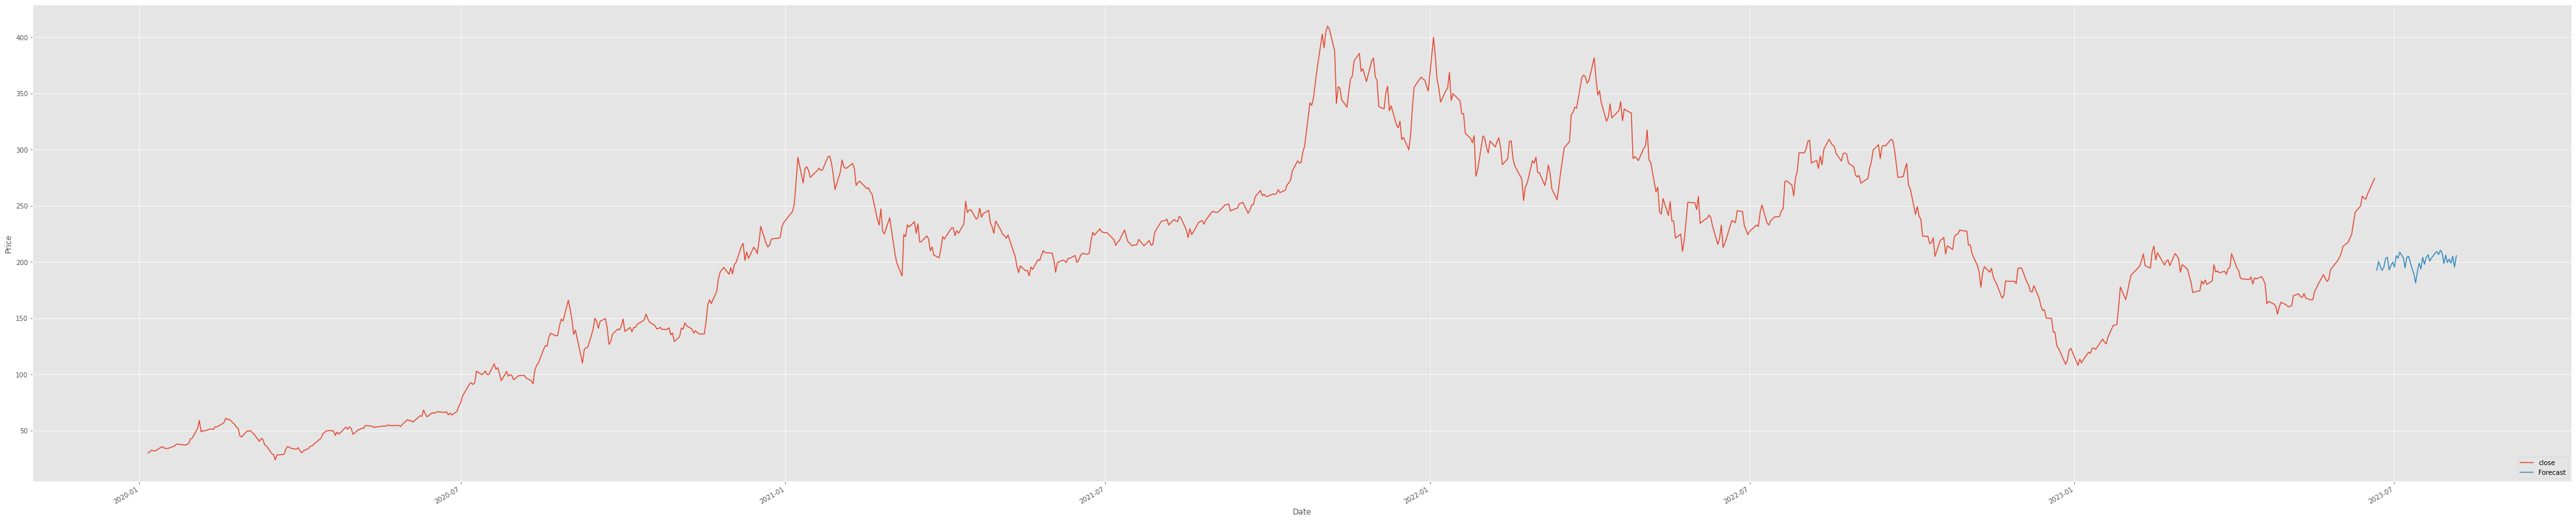

In [16]:
style.use("ggplot")
plt.figure(figsize=(70, 15)) 
df['close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')

In [17]:
accuracy

0.5935175645988048